# 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# 2. Loading the data

In [2]:
df_cars = pd.read_excel('cars.xls')

In [3]:
df_cars

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
389,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,US
390,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,Europe
391,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,US
392,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,US


# 3. Pre-processing & Exploring Data

In [4]:
df_cars.head(10)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,US
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,US
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,US
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,US
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,US


In [5]:
df_cars.tail(10)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
384,chrysler lebaron medallion,26.0,4,156.0,92.0,2585,14.5,82,US
385,ford granada l,22.0,6,232.0,112.0,2835,14.7,82,US
386,toyota celica gt,32.0,4,144.0,96.0,2665,13.9,82,Japan
387,dodge charger 2.2,36.0,4,135.0,84.0,2370,13.0,82,US
388,chevrolet camaro,27.0,4,151.0,90.0,2950,17.3,82,US
389,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,US
390,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,Europe
391,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,US
392,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,US
393,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,US


In [6]:
df_cars.isnull().sum()   #here, '.sum()' helps in checking the exact number of instances null valaue takes place.

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [7]:
# here, we can see that horsepower contains a few problems.

In [8]:
df_cars.loc[~df_cars.Horsepower.apply(np.isreal)]

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin


Here, since we do not have any values, we can conclude that these values are rather null.

In [9]:
missing_values = df_cars[df_cars['Horsepower'].isnull()]

In [10]:
missing_values

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
350,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,Europe
370,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,US


since, we got two NaN values, we can either delete these 2 rows which is not usually a better choice as it reduces the number of data points in our data. Therefore, a bettter aproach usually is to replace these null values with either mean, mode or median.

In [11]:
df_cars['Horsepower'] = df_cars['Horsepower'].fillna(df_cars['Horsepower'].mean())

This replaces the null valaues with mean values, let's check it out.|

In [12]:
df_cars

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
389,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,US
390,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,Europe
391,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,US
392,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,US


In [13]:
df_cars.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

Here, we can confirm that there's no null value left in the data. This implies that the data is fairly clean now.

In [14]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         394 non-null    object 
 1   MPG           394 non-null    float64
 2   Cylinders     394 non-null    int64  
 3   Displacement  394 non-null    float64
 4   Horsepower    394 non-null    float64
 5   Weight        394 non-null    int64  
 6   Acceleration  394 non-null    float64
 7   Year          394 non-null    int64  
 8   Origin        394 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.8+ KB


Since, datatype of 'Horsepower' is actually int type, we can and should channge it int from float.

In [15]:
df_cars['Horsepower']=df_cars['Horsepower'].astype('int64')
df_cars.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

## 3b. Exploring the data

In [16]:
df_cars.shape

(394, 9)

In [17]:
len(df_cars)

394

In [18]:
df_cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,23.472843,5.464467,194.062183,104.467005,2976.060914,15.554569,76.007614
std,7.805051,1.704658,104.508345,38.393108,847.891143,2.763179,3.695461
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.250000,2226.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,94.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,265.750000,125.000000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# 4. Non-graphical Univariate Analysis

i.e Analysis of one feature at a time without visualization which helps to have a quick check and make/have a look at potential clusters.

In [19]:
df_cars.head(10)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140,3449,10.5,70,US
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,US
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,US
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,US
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,US
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,US


In [20]:
df_cars['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

This tells us that there are only 3 origins i.e US, Japan and Europe

In [21]:
df_cars['Cylinders'].value_counts()

Cylinders
4    201
8    103
6     83
3      4
5      3
Name: count, dtype: int64

This tells us the hierarchy of types of cylenders in the given dataset with maximum as 4 cylinder and minimum of 5 cylinder vehicals.
Using this we might just ignore 3 and 5 cylinders as they are negligible compared to the rest.

Using this information, we can easily filter and sub-devide into logical groups of intrest. Let's say we want to see the behaviour of the most used cars, in this case the 4 cylinder cars.

In [22]:
df_4cyl = df_cars[(df_cars['Cylinders'] == 4)]
df_4cyl.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,201.000000,201.0,201.000000,201.000000,201.00000,201.000000,201.000000
mean,29.278607,4.0,109.828358,78.537313,2308.81592,16.597512,77.074627
std,5.671595,0.0,21.479796,14.675144,345.01703,2.387958,3.745584
min,18.000000,4.0,68.000000,46.000000,1613.00000,11.600000,70.000000
25%,25.000000,4.0,91.000000,68.000000,2050.00000,14.800000,74.000000
50%,28.400000,4.0,105.000000,78.000000,2234.00000,16.200000,78.000000
75%,33.000000,4.0,121.000000,89.000000,2565.00000,18.000000,80.000000
max,46.600000,4.0,156.000000,115.000000,3270.00000,24.800000,82.000000


Here, we have created a seperate database for 4 cylinders cars data. And, we are going to use this in later stages.

## 4b. Graphical Univariate Analysis

### Histogram

<Axes: >

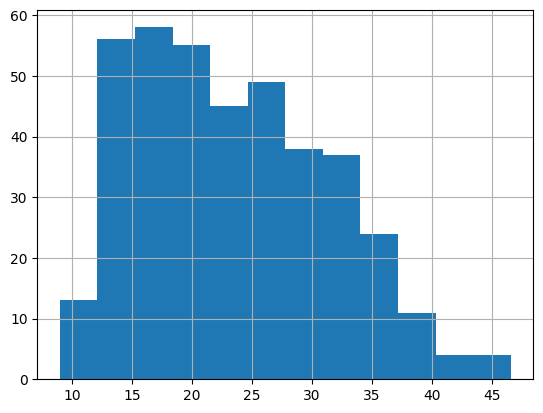

In [23]:
df_cars['MPG'].hist(bins=12)

<Figure size 0x500 with 0 Axes>

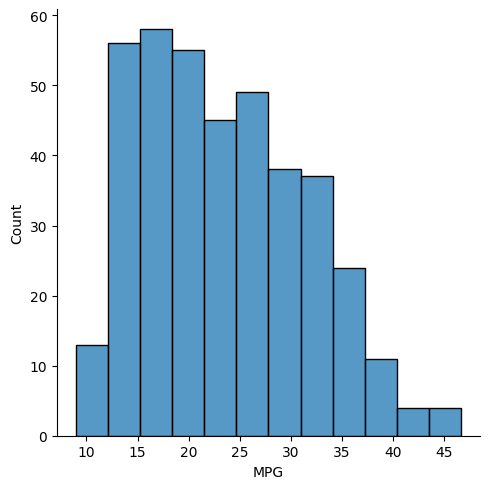

In [24]:
plt.figure(figsize=(0, 5))
plt.tight_layout()
sns.displot(df_cars['MPG'])

We can clearly observe that the data is NOT normally distributed and rathrer RIGHT SKEWED. It could be due to mix of other type of cylinders cars, this also tells us that the higher frequencies are more conceentrated towards the lower displacements. 

### Boxplot

It is the visual representation of the statistical summery which includes min and max value; quartile(i.e frist, second and third)

<Axes: >

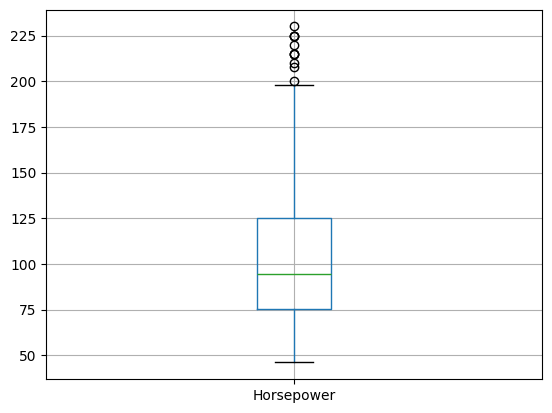

In [25]:
df_cars.boxplot(column='Horsepower')

Let's make it more clear

<Axes: title={'center': 'Horsepower'}, xlabel='Cylinders'>

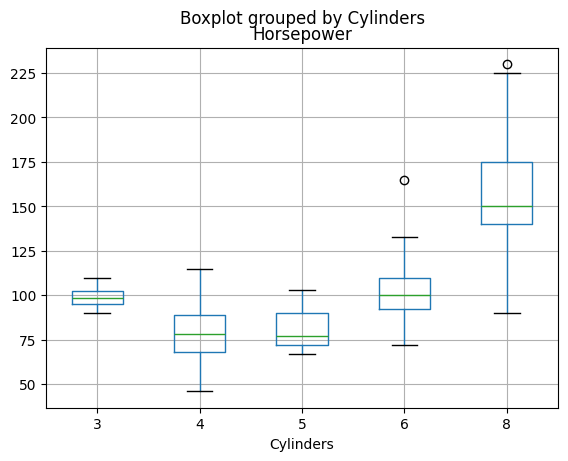

In [26]:
df_cars.boxplot(column='Horsepower', by = 'Cylinders')

Here, we have simply categorized the box plot based on different cylinders.

# 5. Dealing with Outliers

It depends if we should deal with the ouliers as it varies from domain to domain

In [27]:
len(df_cars['Horsepower'])

394

In [28]:
upper = df_cars['Horsepower'].quantile(1-0.2)
upper

140.0

Now let's setup a mask that will act on this

In [29]:
mask = (df_cars['Horsepower']<upper)

In [30]:
df_cars01 = df_cars[mask]
len(df_cars01)

310

<Axes: xlabel='Horsepower'>

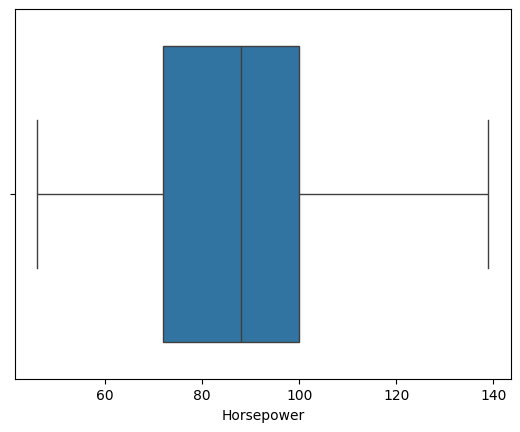

In [31]:
sns.boxplot(x = df_cars01['Horsepower'])

Lets make a histogram for categorical data i.e. Origin

<Axes: xlabel='Origin', ylabel='count'>

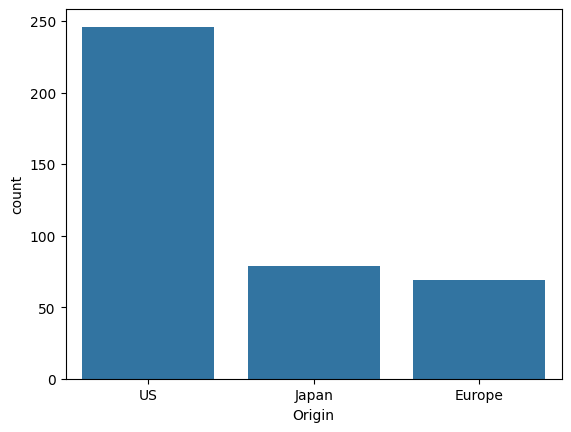

In [32]:
sns.countplot(x = df_cars.Origin)

# 6. Non-Graphical Bivariate Analysis

i.e. Analysis of co-realation between two variables. And, non graphical analysis is numerical analysis.

In [33]:
numeric_columns = df_cars.select_dtypes(include='number')

# Calculate correlations and sort them
correlations = numeric_columns.corr()['MPG'].sort_values()

# Print or use the correlations as needed
print(correlations)


Weight         -0.832279
Displacement   -0.805249
Cylinders      -0.777138
Horsepower     -0.776481
Acceleration    0.420574
Year            0.580384
MPG             1.000000
Name: MPG, dtype: float64


From above, we can clearly make conclusions that weight, displacement, cylinders, horsepower shows STRONG NEGETIVE CORRELATION i.e. inverse correlation with MPG. And, Acceleration, year shows a positive correaltion with MPG.

## 6b. Graphical Bi-variate Analysis

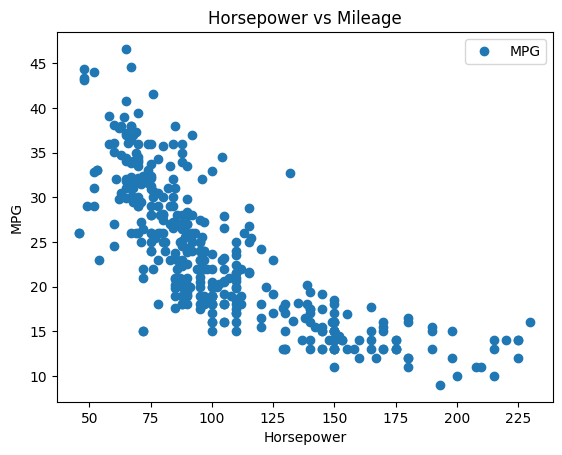

In [34]:
df_cars.plot(x = 'Horsepower', y = 'MPG', style = 'o')
plt.title('Horsepower vs Mileage')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Now, let's run scatter matrix to see all the relations

In [35]:
MPG = df_cars['MPG']

array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

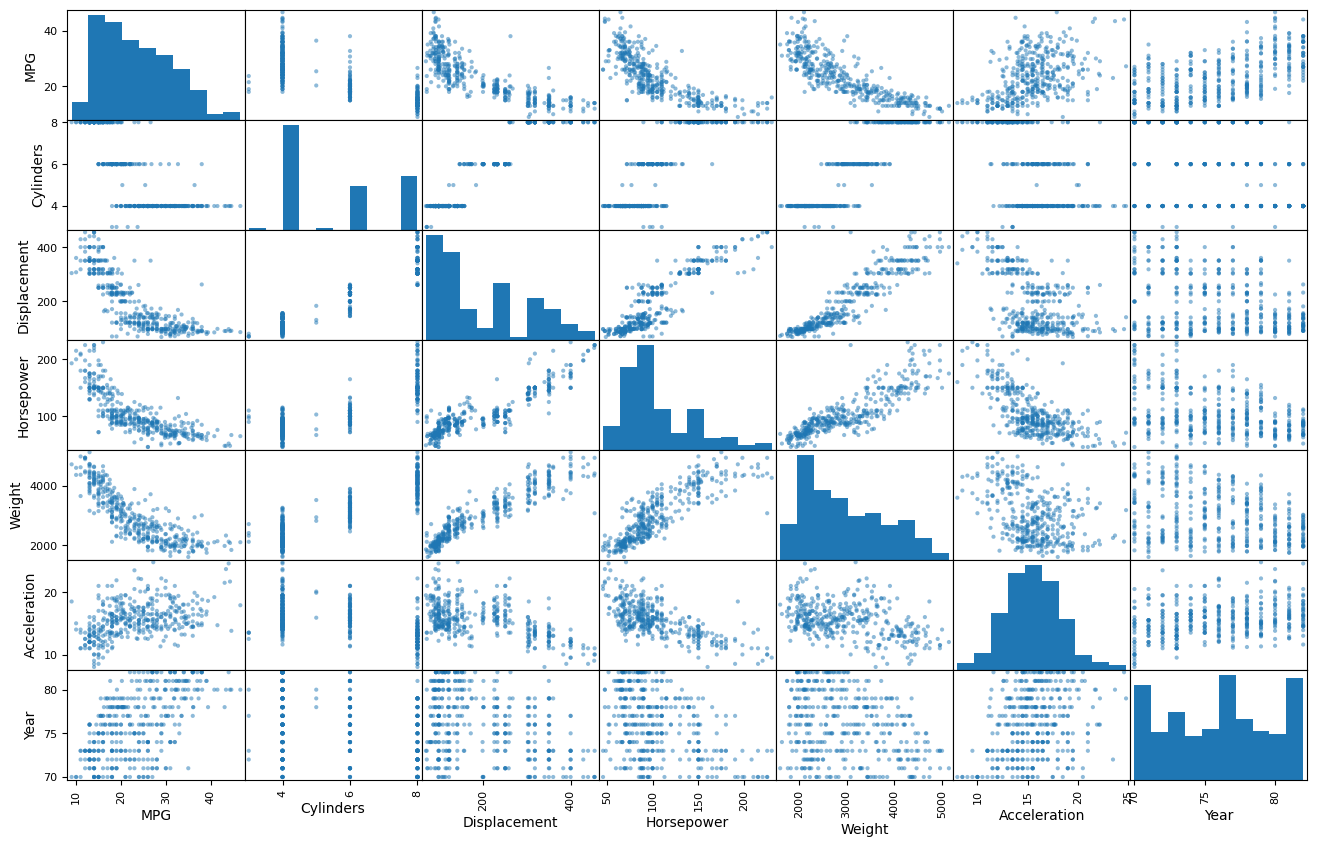

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_cars, figsize = (16,10), alpha = 0.5, diagonal = 'hist')

# MACHINE LEARNING Base Run

## 1. Set up the data: Predicators and Target Variable

Let's convert categorical data into numerical data using one hot encoding as for ML model it is best to have data in numerical datatype.

In [37]:
df_cars = pd.get_dummies(df_cars,columns = ['Origin'])

In [38]:
column_to_consider = ['Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Year', 
                      'Origin_Europe', 'Origin_Japan', 'Origin_US']

In [39]:
X = df_cars[column_to_consider].values
y = df_cars['MPG'].values

By above commands we have defined our X = "features" (independent labels) and y = "target" (dependent variable)

## 2. Splitting the data into train and test set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state = 0)

In [41]:
X_test.shape

(79, 8)

In [42]:
X_train.shape

(315, 8)

In [43]:
df_cars.shape

(394, 11)

## 3. Define and train the model

In [44]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [45]:
X_test.shape

(79, 8)

In [46]:
column_to_consider.append('Intercept')

In [47]:
column_to_consider

['Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Year',
 'Origin_Europe',
 'Origin_Japan',
 'Origin_US',
 'Intercept']

In [48]:
coeff_df = pd.DataFrame({'Predictor': column_to_consider,
                         'Coefficient': np.append(regression_model.coef_, regression_model.intercept_)})

In [49]:
coeff_df

,Predictor,Coefficient
0,Displacement,0.020638
1,Horsepower,-0.023662
2,Weight,-0.007083
3,Acceleration,0.066946
4,Year,0.791481
5,Origin_Europe,1.000795
6,Origin_Japan,0.857662
7,Origin_US,-1.858458
8,Intercept,-17.346309


## 4. Predict Output

In [50]:
y_pred = regression_model.predict(X_test)

Now, let's define another table df that has actual test values listed in a column named 'actual' and a respective predictde values in a seperated column 'predicted'.

In [51]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

## 5. Evaluate the performance of Algorithm

The following three methods we will going to do to check the performance: 
1. Visual check
2. Percentage Prediction (the error could be defined by the client)
3. RMS method

## 1. Visual check

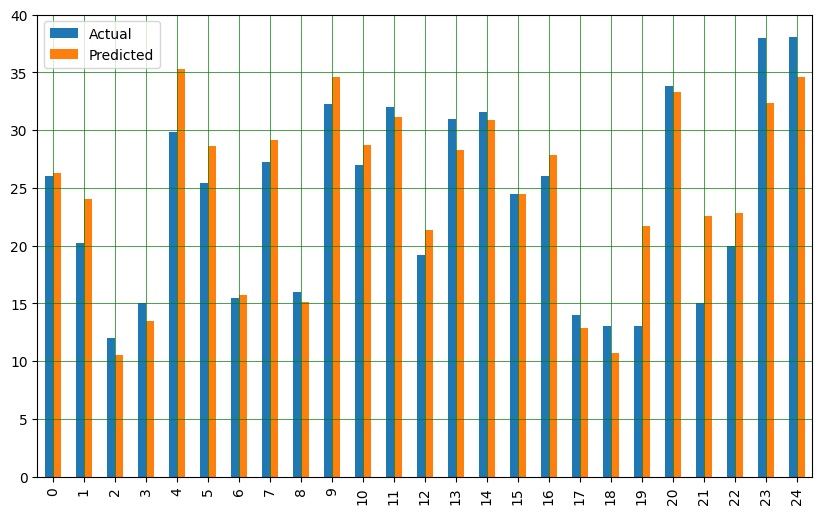

In [52]:
df1.plot(kind = 'bar', figsize = (10,6))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

## 2. Prediction within tolerance

In [53]:
df0 = df.head(79)
df0.to_csv("C:/Users/keepl/Documents/Data Science Portfolio/ML/Project 2/cars_model_test.csv")

## 3. Root Mean Squar Error (RMSE)

In [54]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Erroe: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  2.2872228935069177
Mean Squared Erroe:  2.2872228935069177
Root Mean Squared Error:  2.988947709649273


## 4. IMPROVISED PERFORMANCE - 1st approach - selectt only 4 cylinder data

## Visualize the data

In [55]:
df_4cyl.shape

(201, 9)

Now, we are seggeragating the data to make the model more accuarate.

C:\Users\keepl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\keepl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\keepl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

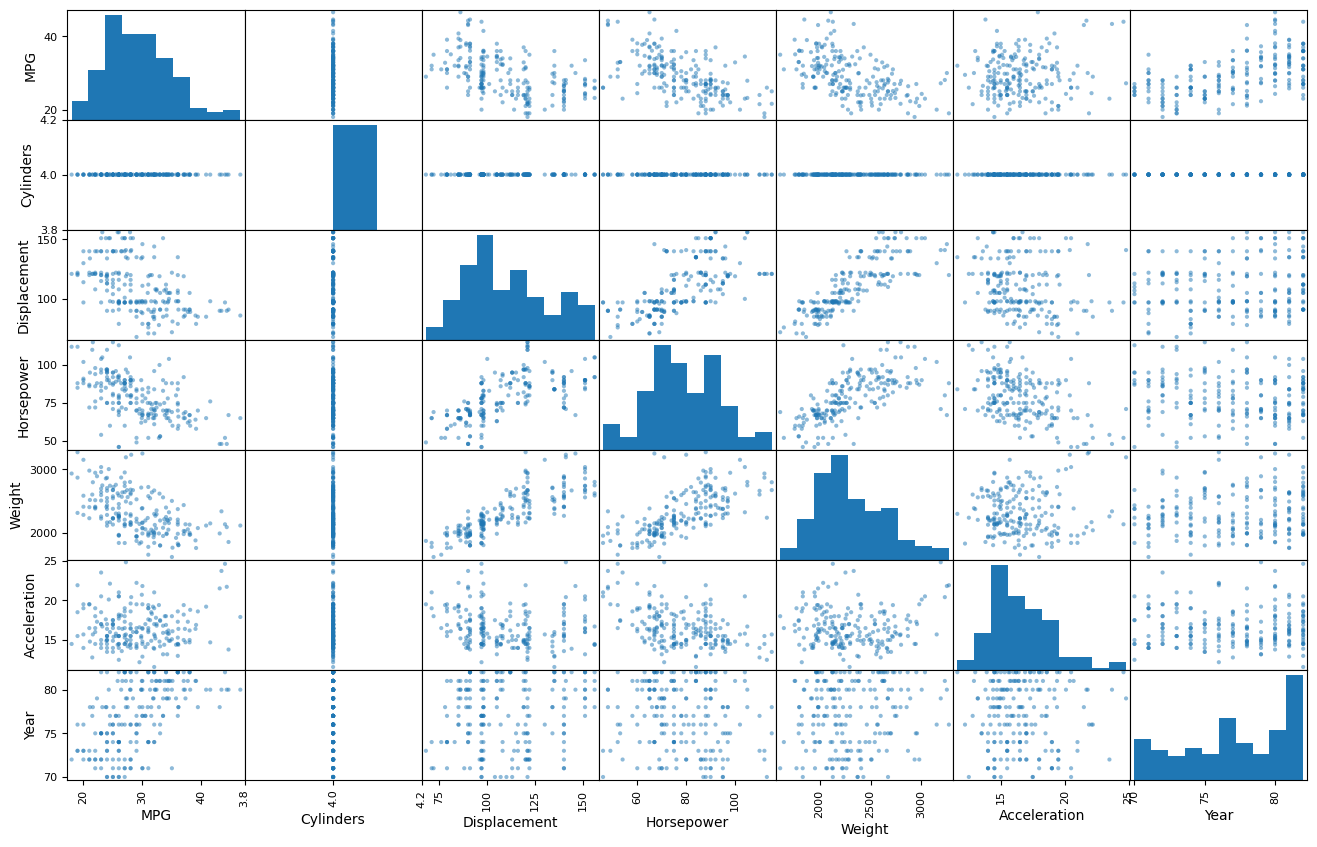

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_4cyl, figsize = (16,10), alpha = 0.5, diagonal = 'hist')

## Set up the data: Predictor and target variable

In [57]:
df_4cyl = pd.get_dummies(df_4cyl,columns = ['Origin'])
column_to_consider = ['Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Year', 
                      'Origin_Europe', 'Origin_Japan', 'Origin_US']

X = df_4cyl[column_to_consider].values
y = df_4cyl['MPG'].values

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state = 0)

len(y_test)

X_test.shape

(41, 8)

## Define and train the model

In [58]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

column_to_consider.append('Intercept')

coeff_df = pd.DataFrame({'Predictor': column_to_consider,
                         'Coefficient': np.append(regression_model.coef_, regression_model.intercept_)})

coeff_df

,Predictor,Coefficient
0,Displacement,-0.024912
1,Horsepower,-0.045888
2,Weight,-0.007248
3,Acceleration,0.023609
4,Year,0.943730
5,Origin_Europe,0.073671
6,Origin_Japan,0.465143
7,Origin_US,-0.538814
8,Intercept,-20.811241


In [59]:
y_pred = regression_model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

## Evaluate the performance of Algorithm

#### Visual Check

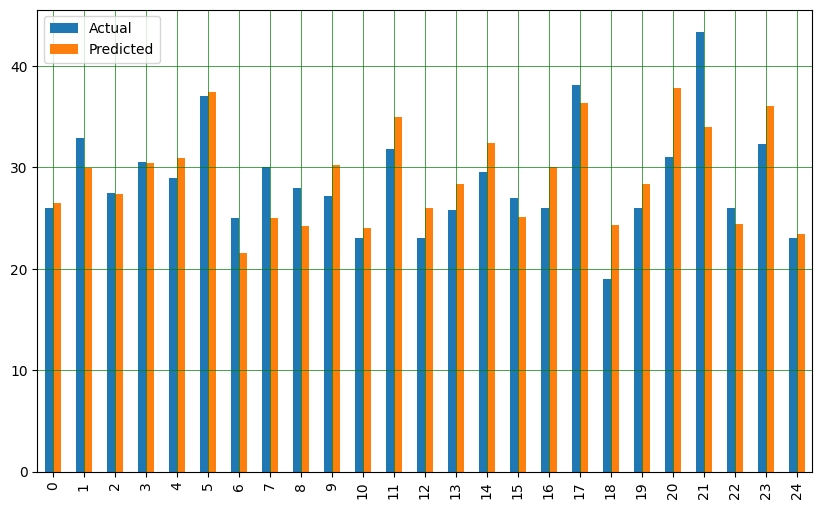

In [60]:
df1.plot(kind = 'bar', figsize = (10,6))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Prediction with tolerance

In [61]:
df0 = df.head(41)
df0.to_csv("C:/Users/keepl/Documents/Data Science Portfolio/ML/Project 2/4cyl_model_test.csv")

#### Root Mean Square Error (RMSE)

In [62]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Erroe: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  2.6321125117656634
Mean Squared Erroe:  2.6321125117656634
Root Mean Squared Error:  3.385810999226756


Here, RMSE went up due to insuffcient trining data by 0.3

Conclusion so far: 
1. The data became more homogeneous, however due to insufficient data it the model became underfitting.
2. Also, the data has high variance.

Now, to resolve these issues let's add some dummy data.

for the sake of my understanding of the concept, I've created a dummy data.

In [63]:
df_4dum = pd.read_excel('dummy-data_cars.xls')
df_4dum.shape

(395, 9)

In [64]:
df_4dum.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

#### Set up the data: Predicators and target variable

C:\Users\keepl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\keepl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\keepl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

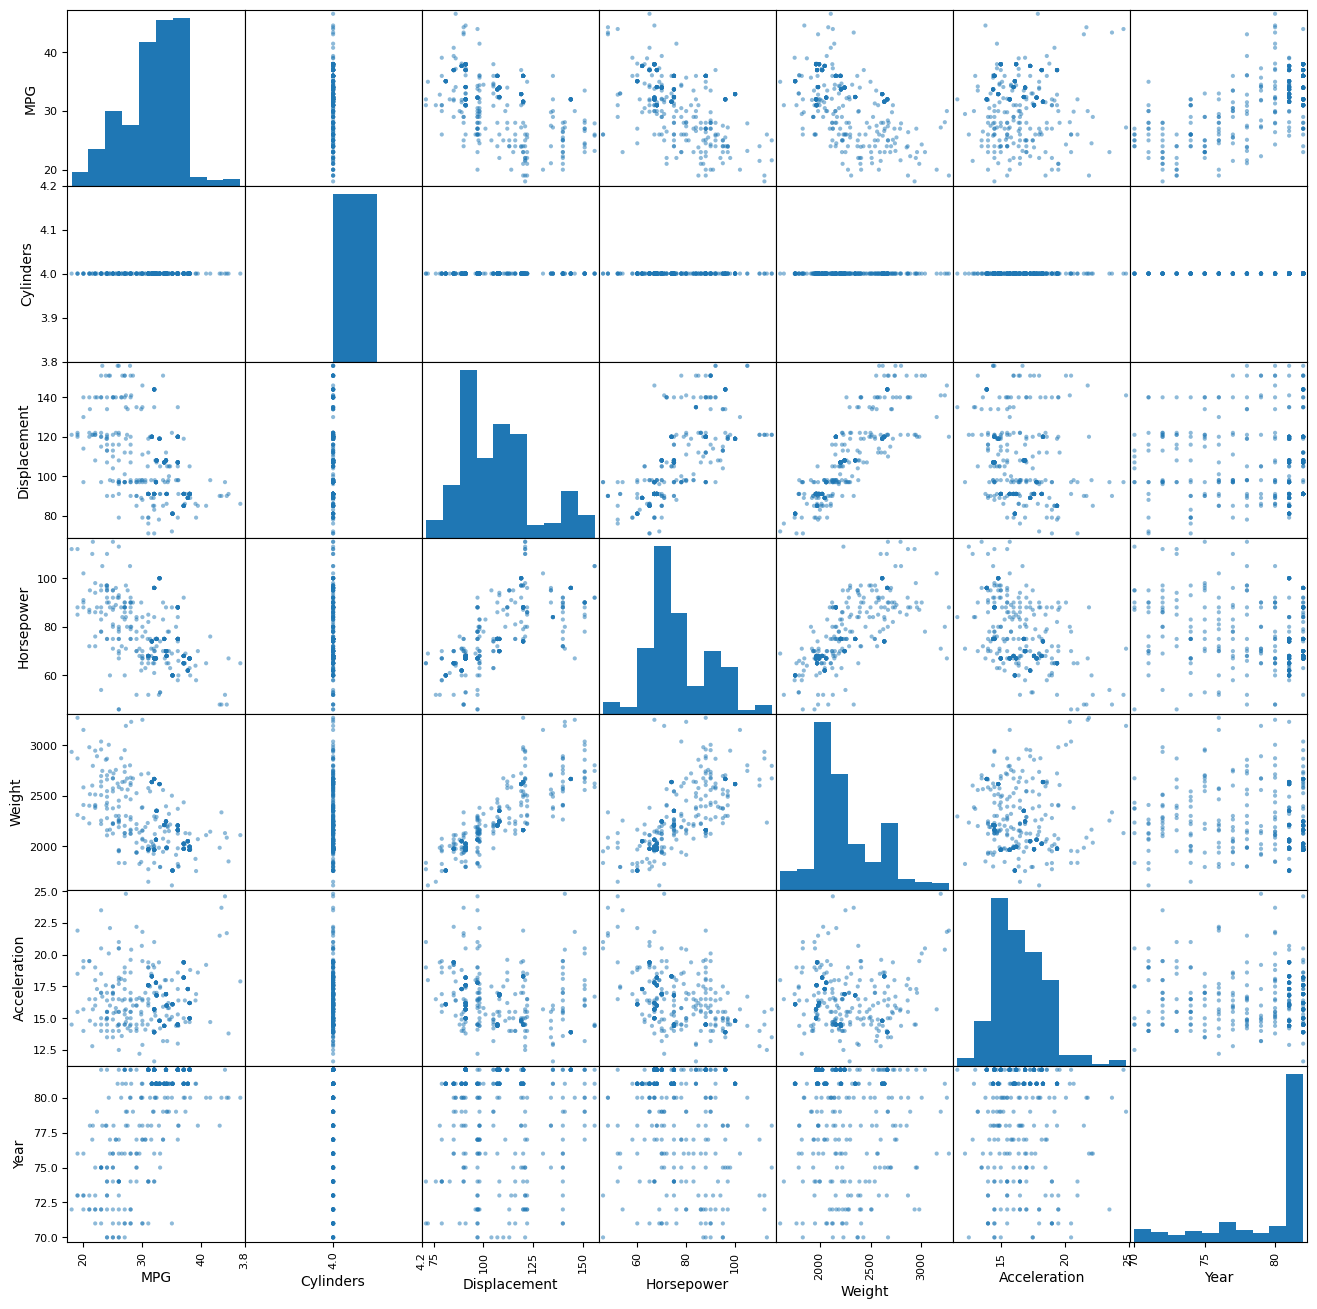

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_4dum, figsize = (16,16), alpha = 0.5, diagonal = 'hist')

#### Define and train the model

In [66]:
df_4dum = pd.get_dummies(df_4dum,columns = ['Origin'])
column_to_consider = ['Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Year', 
                      'Origin_Europe', 'Origin_Japan', 'Origin_US']

X = df_4dum[column_to_consider].values
y = df_4dum['MPG'].values

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state = 0)

len(y_test)

X_test.shape

(79, 8)

In [67]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

column_to_consider.append('Intercept')

coeff_df = pd.DataFrame({'Predictor': column_to_consider,
                         'Coefficient': np.append(regression_model.coef_, regression_model.intercept_)})

coeff_df

,Predictor,Coefficient
0,Displacement,-0.045223
1,Horsepower,-0.072211
2,Weight,-0.003062
3,Acceleration,-0.260472
4,Year,0.837333
5,Origin_Europe,0.288829
6,Origin_Japan,0.509528
7,Origin_US,-0.798358
8,Intercept,-13.568474


#### Predict Output

In [68]:
y_pred = regression_model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

#### Visual Comparision

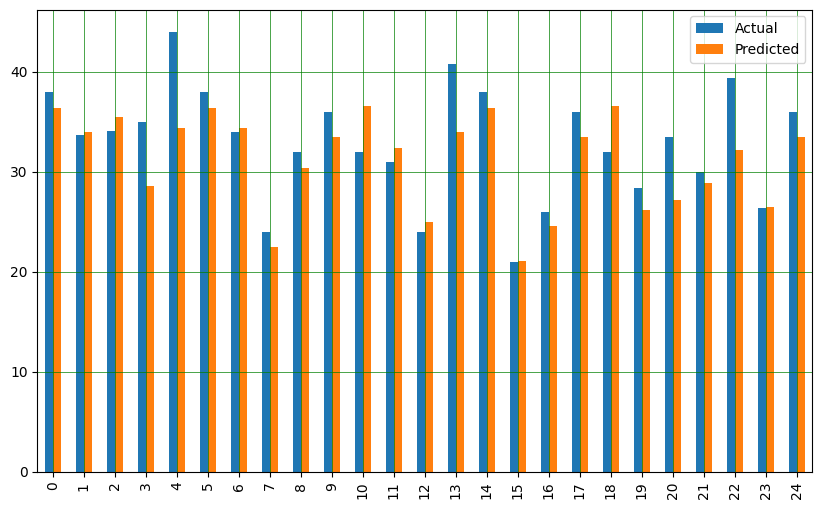

In [69]:
df1.plot(kind = 'bar', figsize = (10,6))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Prediction within tolerance

In [70]:
df0 = df.head(41)
df0.to_csv("C:/Users/keepl/Documents/Data Science Portfolio/ML/Project 2/df_4dum_model_test.csv")

In [71]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Erroe: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  2.3364680889181577
Mean Squared Erroe:  2.3364680889181577
Root Mean Squared Error:  3.0633726000089583


## Conclusion

Hence, we were able to improve the model significantly. However, this is just the tip of the ice berg.
we can easily improve the accuracy by the follwing measures:
1. Increase the number of samples.
2. We should try to achieve uniformity in the data.
3. We can try to use other types of models as well.
4. We can use scaling to make the data of same otrder in magnitude.
5. We can also increase acuracy of the model by adding more parameters such as distance travelled, time take or age of vehicle.

Further, we can extend the application for the car manufacturere to conduct large number of test say area or city based to advise more realistic estimates to the customers.

# Thank you!